In [1]:
from random import randint

N = 30
data = list()
category = list()

for i in range(N):
    data.append((randint(1, 100), randint(1, 100)))
    category.append(randint(0,1))

In [2]:
data

[(40, 45),
 (75, 42),
 (93, 40),
 (73, 9),
 (55, 49),
 (77, 42),
 (40, 77),
 (27, 54),
 (69, 59),
 (46, 75),
 (28, 17),
 (24, 38),
 (28, 23),
 (87, 30),
 (43, 15),
 (20, 18),
 (74, 96),
 (21, 79),
 (60, 2),
 (40, 9),
 (78, 67),
 (58, 58),
 (17, 1),
 (72, 70),
 (12, 76),
 (96, 35),
 (62, 9),
 (23, 56),
 (63, 11),
 (95, 28)]

In [22]:
from math import sqrt

def euclidean(inst1, inst2):
    return sqrt((inst1[0] - inst2[0]) ** 2 + (inst1[1] - inst2[1]) ** 2)

In [23]:
def cosine(inst1, inst2):
    innerProduct = 0
    inst1Length = euclidean((0,0), inst1)
    inst2Length = euclidean((0,0), inst2)
    
    for i in range(len(inst1)):
        innerProduct += inst1[i] * inst2[i]        
        
    return innerProduct / (inst1Length * inst2Length)

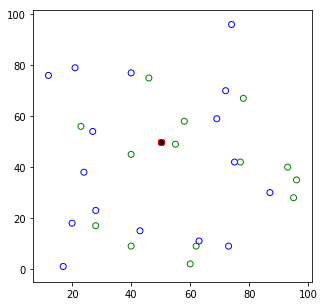

In [24]:
import matplotlib.pyplot as plt

x = [point[0] for point in data]
y = [point[1] for point in data]

target = (50, 50)
distance = list()
angle = list()

colorMap = ["b", "g"]

plt.rcParams["figure.figsize"] = (5, 5)

for i in range(N):
    distance.append((i,euclidean(data[i], target)))
    angle.append((i, cosine(data[i], target)))
    plt.scatter(x[i], y[i], facecolors= "none", edgecolors= colorMap[category[i]])
#     plt.scatter(x[i], y[i])    
    plt.scatter(target[0], target[1], facecolors="k", edgecolors="r")
    
plt.show()    

In [28]:
K=3

similarity = sorted(distance, key= lambda x:x[1], reverse=False)[:K]
# similarity = sorted(angle, key= lambda x:x[1], reverse=False)[:K]


In [29]:
candidate = list([0] * len(set(category)))

for i in similarity:
    candidate[category[i[0]]] +=1
    print(category[i[0]])

1
1
1


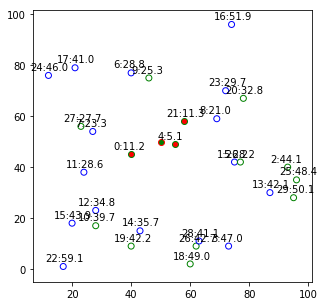

In [30]:
candidate.index(max(candidate))

for i in range(N):
    if i in [_[0] for _ in similarity]:
        plt.scatter(x[i], y[i], facecolors= "r", edgecolors= colorMap[category[i]])
    else:
        plt.scatter(x[i], y[i], facecolors= "none", edgecolors= colorMap[category[i]])
    plt.text(x[i]-6, y[i]+2, "{0}:{1:2.1f}".format(i, distance[i][1]))

plt.scatter(target[0], target[1], facecolors=colorMap[candidate.index(max(candidate))], edgecolors="r")
            

In [31]:
similarity = sorted(angle, key= lambda x:x[1], reverse=False)[:K]